In [67]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

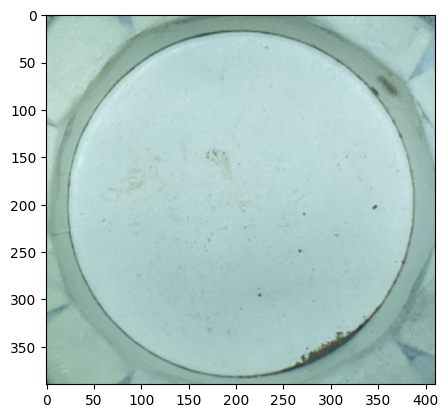

In [76]:
image = cv2.imread("samplepic.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# plt.imshow(image)
# plt.axis("off")
# plt.show()
cropped_image = image[330:720, 330:740 ,:]
plt.imshow(cropped_image)
plt.show()

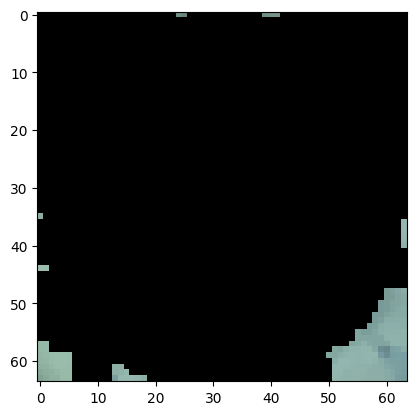

: 

In [77]:
resized_image = cv2.resize(cropped_image, (64, 64))
processed_image = process_image(resized_image)
plt.imshow(processed_image)
plt.show()

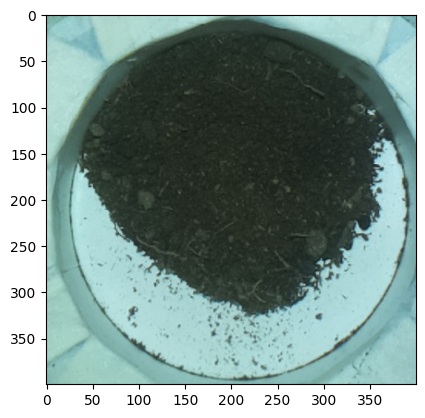

In [69]:
image = cv2.imread("final.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# plt.imshow(image)
# plt.axis("off")
# plt.show()
cropped_image = image[345:745, 310:710 ,:]
plt.imshow(cropped_image)
plt.show()

In [70]:

def get_mask(image):
    image = image.astype(np.uint8)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    binr = cv2.threshold(gray, 16, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    binr = np.invert(binr)
    kernel = np.ones((3, 3), np.uint8)
    mask = cv2.erode(binr, kernel, iterations=3)
    mask = (mask // 255).astype(np.uint8)
    return mask

def process_image(image):
    rgb_image = image.astype(np.uint8)
    mask = get_mask(rgb_image)
    gray = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2GRAY)
    rgb_planes = cv2.split(rgb_image)
    result_planes = []
    for plane in rgb_planes:
        processed_image = cv2.medianBlur(plane, 3)
        processed_image = cv2.bitwise_and(processed_image, processed_image, mask=mask)
        result_planes.append(processed_image)
    result = cv2.merge(result_planes)
    return result

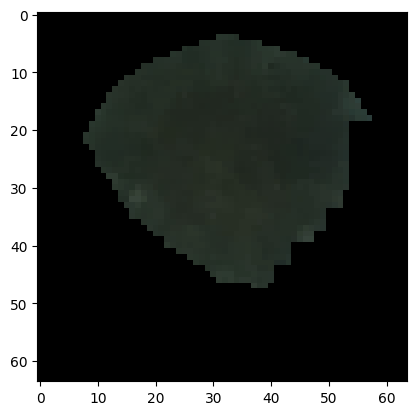

In [71]:
resized_image = cv2.resize(cropped_image, (64, 64))
processed_image = process_image(resized_image)
plt.imshow(processed_image)
plt.show()

In [72]:
# cropped_image.shape

In [73]:
# cropped_image = image[330:720, 330:740 ,:]
# plt.imshow(cropped_image)
# plt.show()

In [74]:
# cropped_image = image[300:750, 300:780 ,:]
# plt.imshow(cropped_image)
# plt.show()